<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [148]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [149]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

Data was collected to see which atributes produced certrain noise decibel levels for blades in an engine for NASA space and air crafts. A model would be useful so one can determine how loud of a sound an airfoil would produce prior to wasting materials to create an airfoil that produces an undesirable amount of noise. 

- Find out how many rows and columns are in `noise`.

In [150]:
noise.shape

(1503, 6)

In [151]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Find out what data types are present.

In [152]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [153]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [154]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

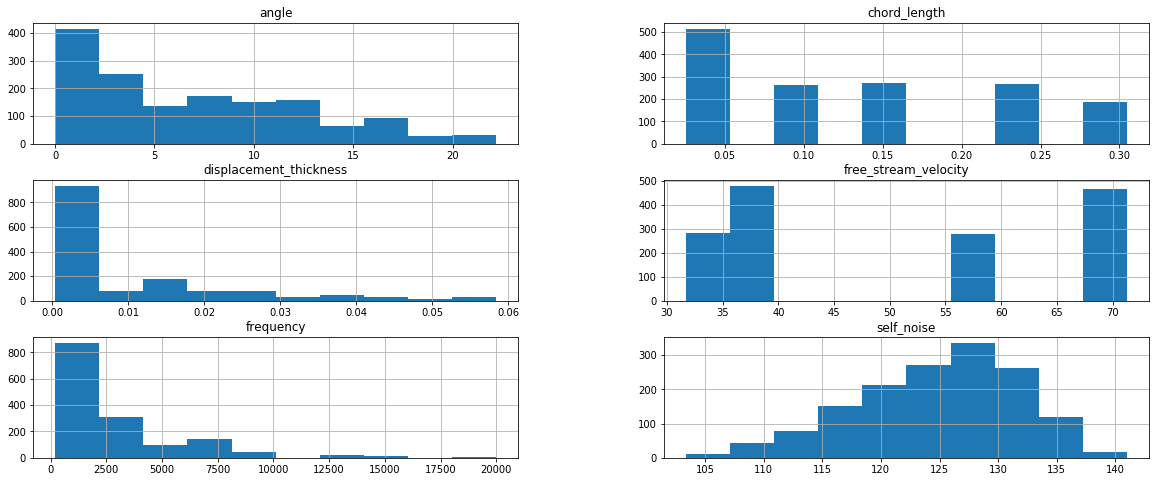

In [155]:
ax = noise.hist(figsize=(20,8))

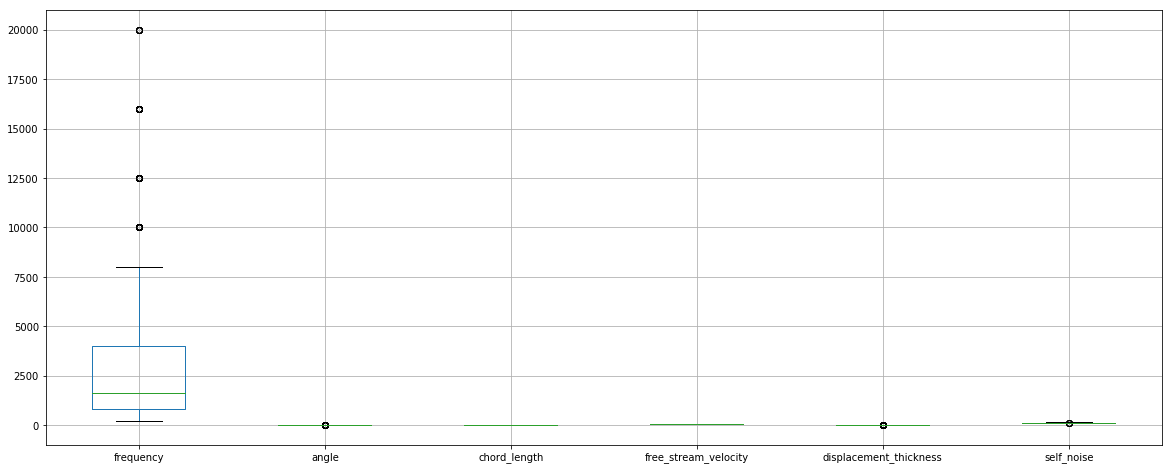

In [156]:
ax2 = noise.boxplot(figsize=(20, 8))

- Which variables are approximately normally distributed?

Self_noise seems normally distributed.

- Which variables show strong skew?

Angle seems very skewed.

- Make a scatterplot of each feature variable with the target variable.

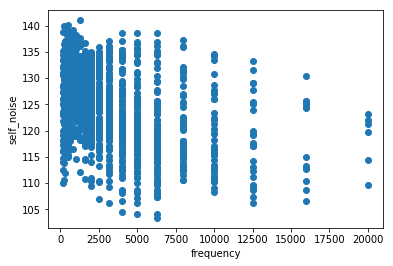

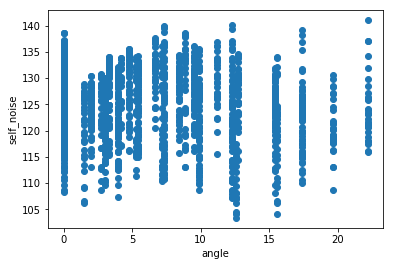

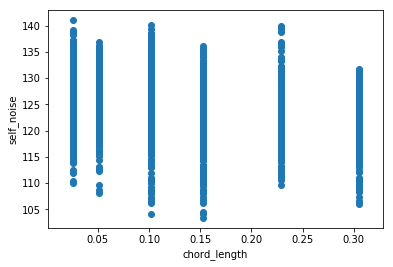

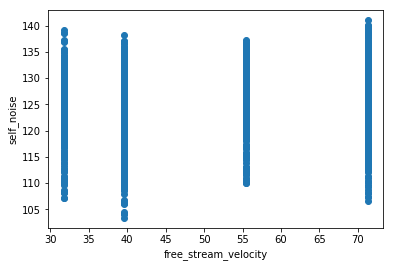

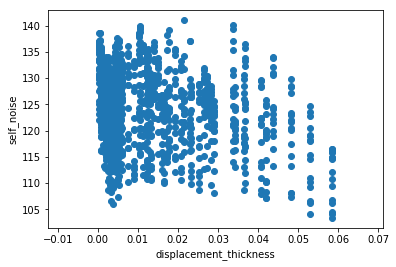

In [157]:
names=['frequency','angle','chord_length','free_stream_velocity','displacement_thickness']

for x in names:
    plt.scatter(noise.loc[:,x],noise.loc[:,'self_noise'])
    plt.xlabel(x)
    plt.ylabel('self_noise')
    plt.show()
    

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

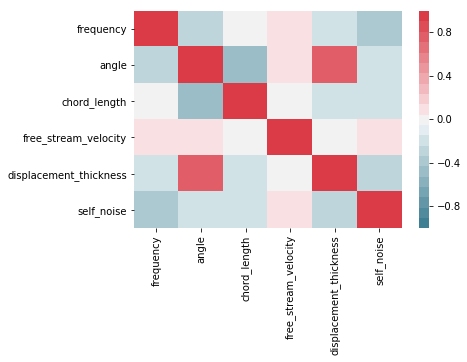

In [158]:
import seaborn as sns
ax = sns.heatmap(noise.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

All variables are negatively correlated with self_noise. I might consider flipping that relationship to better interpret the model once it's plotted out.

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [159]:
feats = names
targ = 'self_noise'
X = noise.drop(targ, axis='columns')
y = noise.loc[:, targ]

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [161]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.5255718811356018
0.5105805592323706


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

It performed slightly better than the test set, but still pretty close. This seems like more of a variance problem than a bias problem. Variance seems higher.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Again, the model performed slightly better than the test set, but still pretty close. This seems like more of a variance problem than a bias problem. Variance seems higher.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [163]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9895417389814588
0.9376647331418003


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Like before, model is slightly biased as it performs better on the train data than the test data. Couild be a bit of variance there. Partially concerning that it's close to 1.0. Overall performance appears to be exactly what one could hope for.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [164]:
#First tryting more trees in rfr as it's easy to do
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

#No further performance gains from 300 to 500 trees.

0.989911836102514
0.9366078697008862


In [165]:
def my_cross_val_score(X, y):
    lr = LinearRegression()
    
    train_scores = []
    test_scores = []

    for rownum in X.index:
        X_train = X.drop(rownum)
        X_test = X.loc[[rownum], :]
        y_train = y.drop(rownum)
        y_test = y.loc[[rownum]]
    
        lr.fit(X_train, y_train)

        train_pred = lr.predict(X_train)
        percent_error_train = mape(y_train, train_pred)
        train_scores.append(percent_error_train)

        test_pred = lr.predict(X_test)
        percent_error_test = mape(y_test, test_pred)
        test_scores.append(percent_error_test)

    return np.array(train_scores).mean(), np.array(test_scores).mean()


def mape(y_true, y_pred):
    return abs((y_true - y_pred) / y_true).mean()

In [166]:
my_cross_val_score(X,y)

(0.029945156091648325, 0.030076568209256912)

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [167]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [168]:
credit.shape

(690, 16)

- Find out what data types are present.

In [169]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

In [170]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


- Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [171]:
credits2 = credit

In [172]:
credits3 = credits2[credits2.loc[:,2]!='?']

In [173]:
credits3.shape

(678, 16)

In [174]:
credits4 = credits3[credits3.loc[:,3]!='?']

/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [175]:
credits5 = credits4
credits5.loc[:,2] = credits5.loc[:,2].astype(float)
credits5.loc[:,3] = credits5.loc[:,3].astype(float)

In [176]:
credits5.loc[:,2] = credits5.loc[:,2].astype(float)

In [177]:
credits5.loc[:,3] = credits5.loc[:,3].astype(float)

In [178]:
credits5.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Find out how many null values there are in each columns.

In [179]:
credits5.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [180]:
credits5.describe()

,2,3,8,11,15
count,678.000000,678.000000,678.000000,678.000000,678.000000
mean,31.568171,4.777625,2.209226,2.435103,1021.240413
std,11.957862,4.997240,3.350755,4.896966,5251.971453
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.000000,5.000000
75%,38.230000,7.437500,2.573750,3.000000,395.500000
max,80.250000,28.000000,28.500000,67.000000,100000.000000


In [181]:
credits5.describe(include='object')

,1,4,5,6,7,9,10,12,13,14,16
count,678,678,678,678,678,678,678,678,678,678,678
unique,3,4,4,15,10,2,2,2,3,169,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,459,511,511,136,391,355,385,369,615,129,373


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

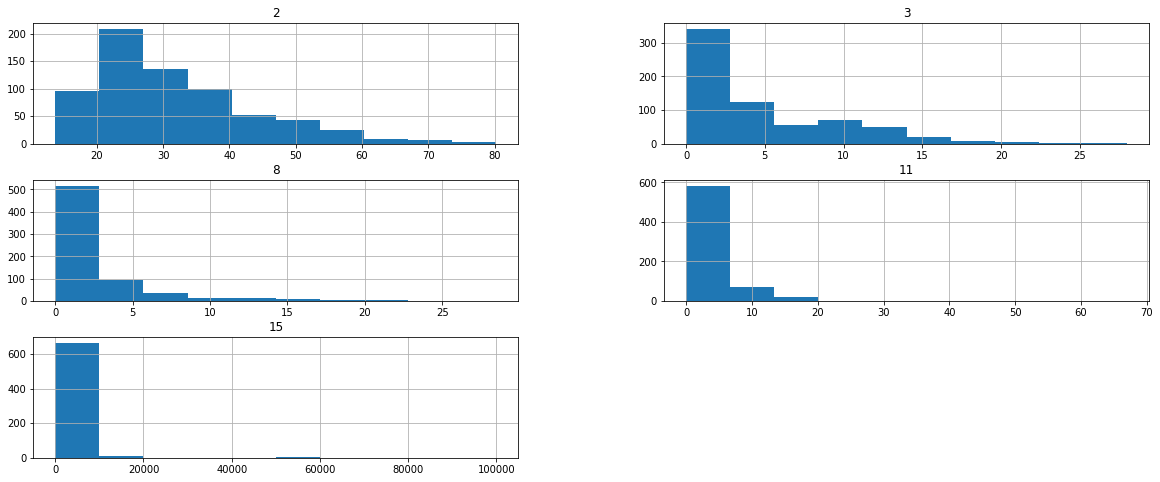

In [182]:
ax = credits5.hist(figsize=(20,8))

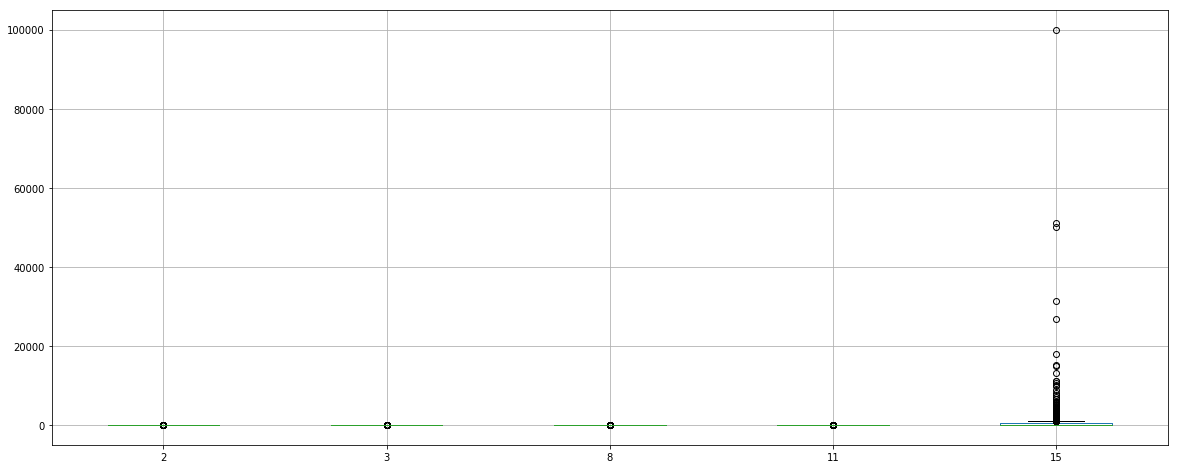

In [183]:
ax2 = credits5.boxplot(figsize=(20, 8))

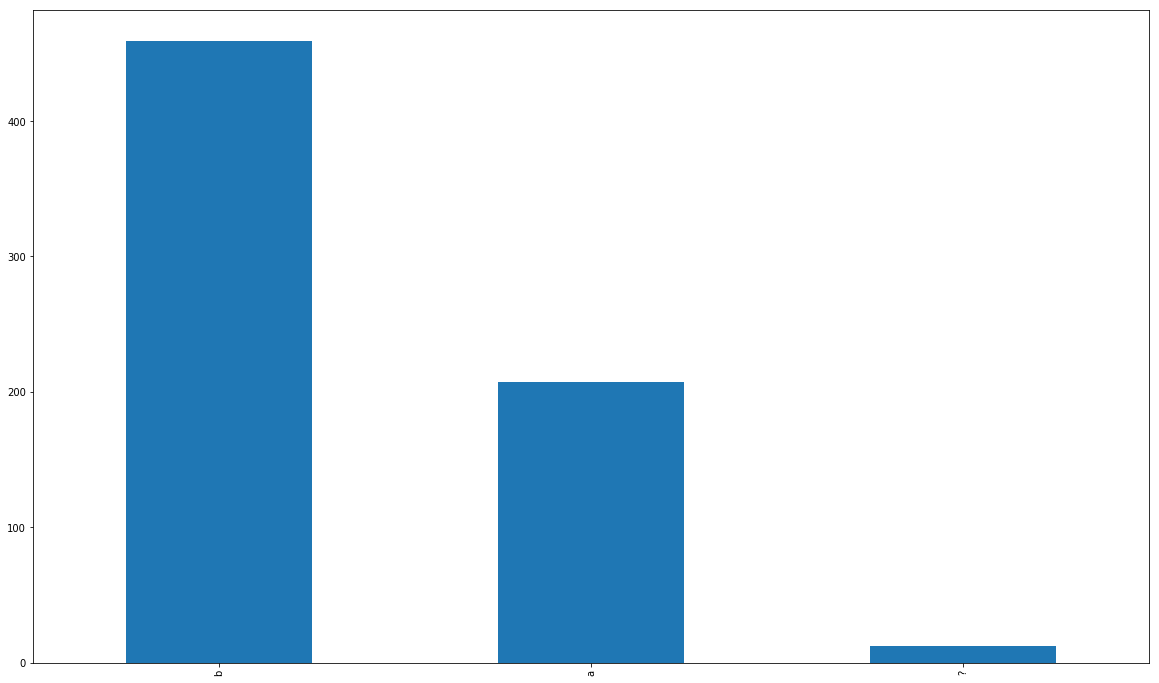

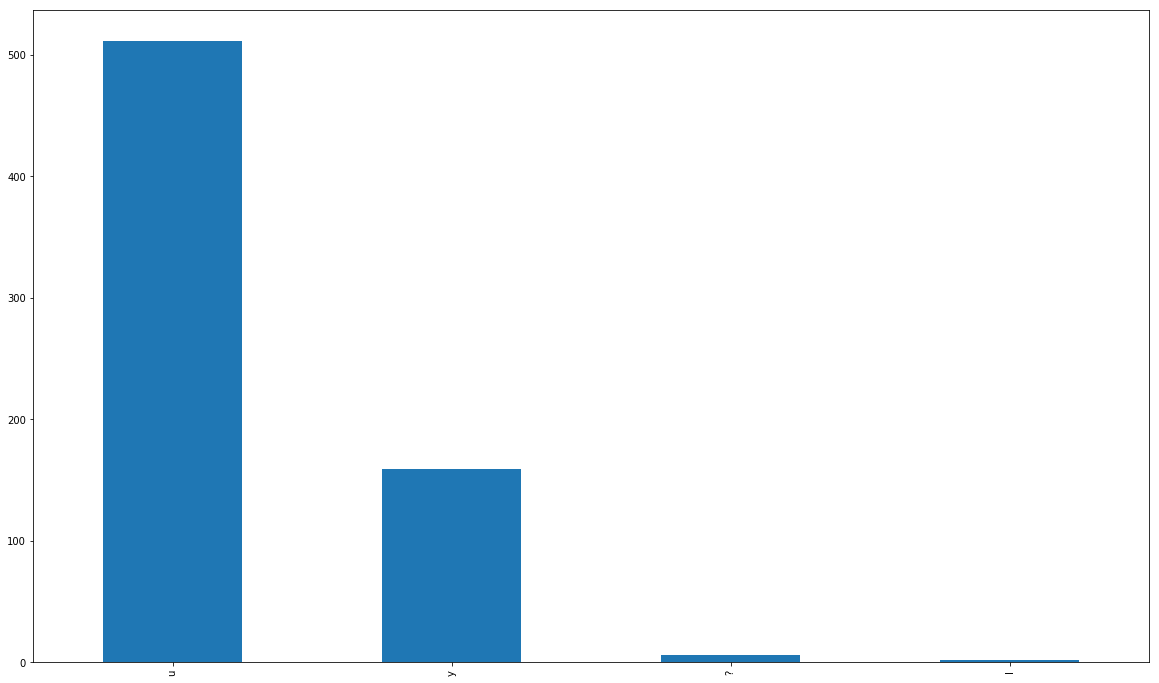

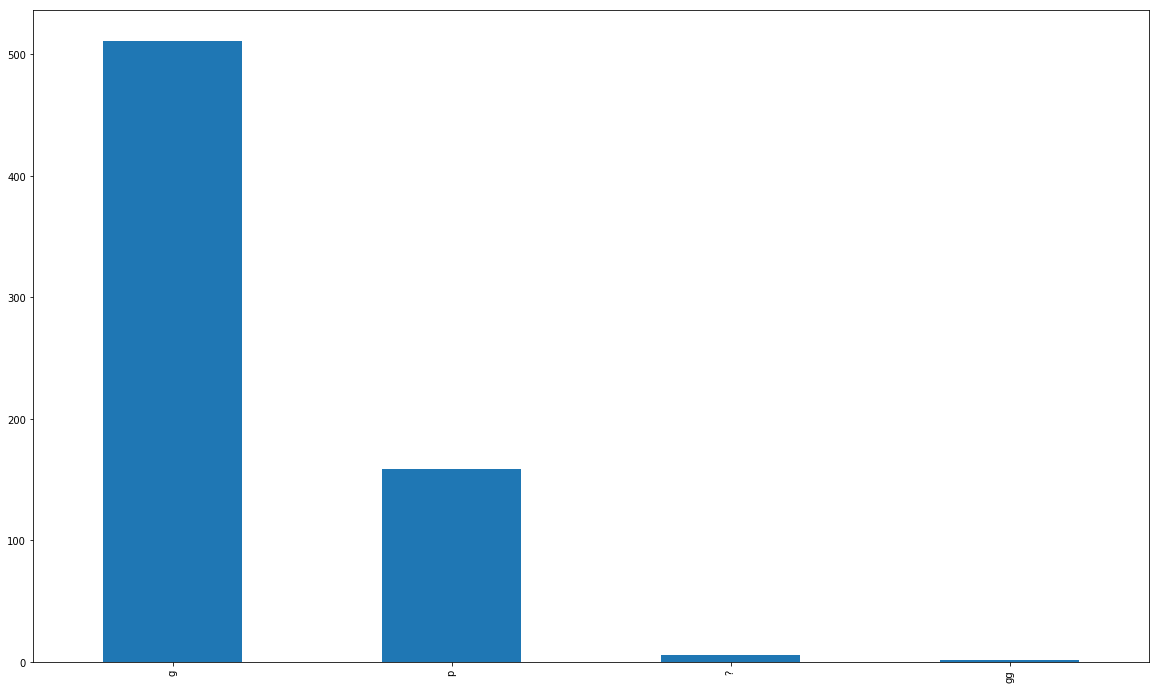

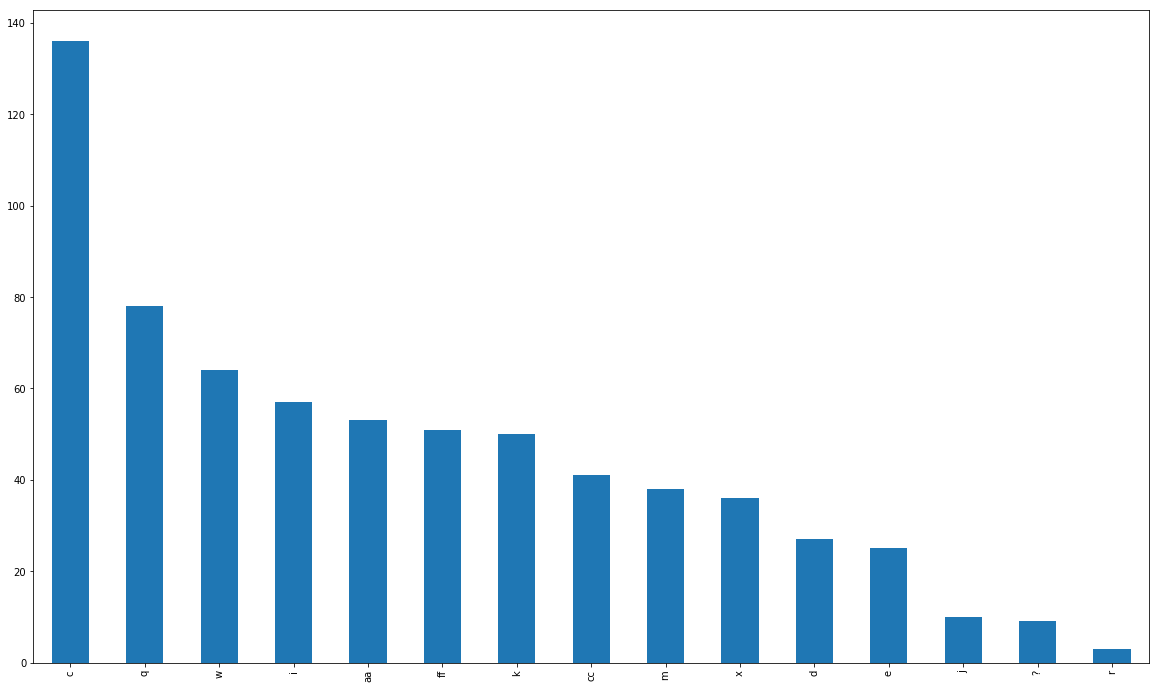

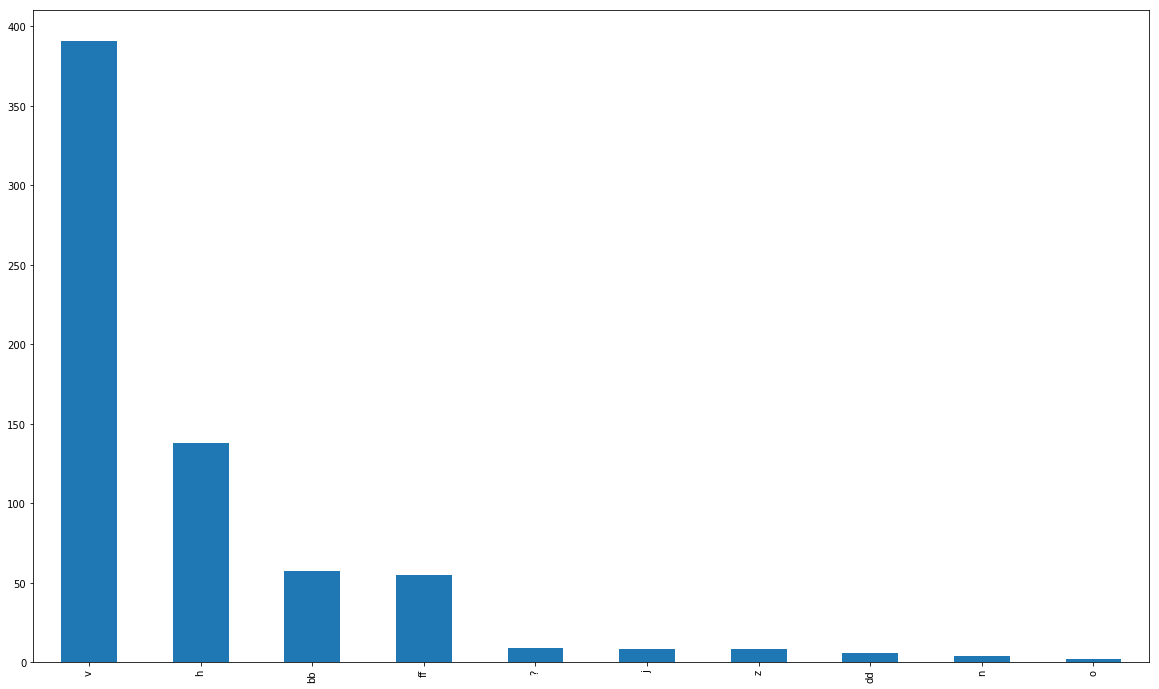

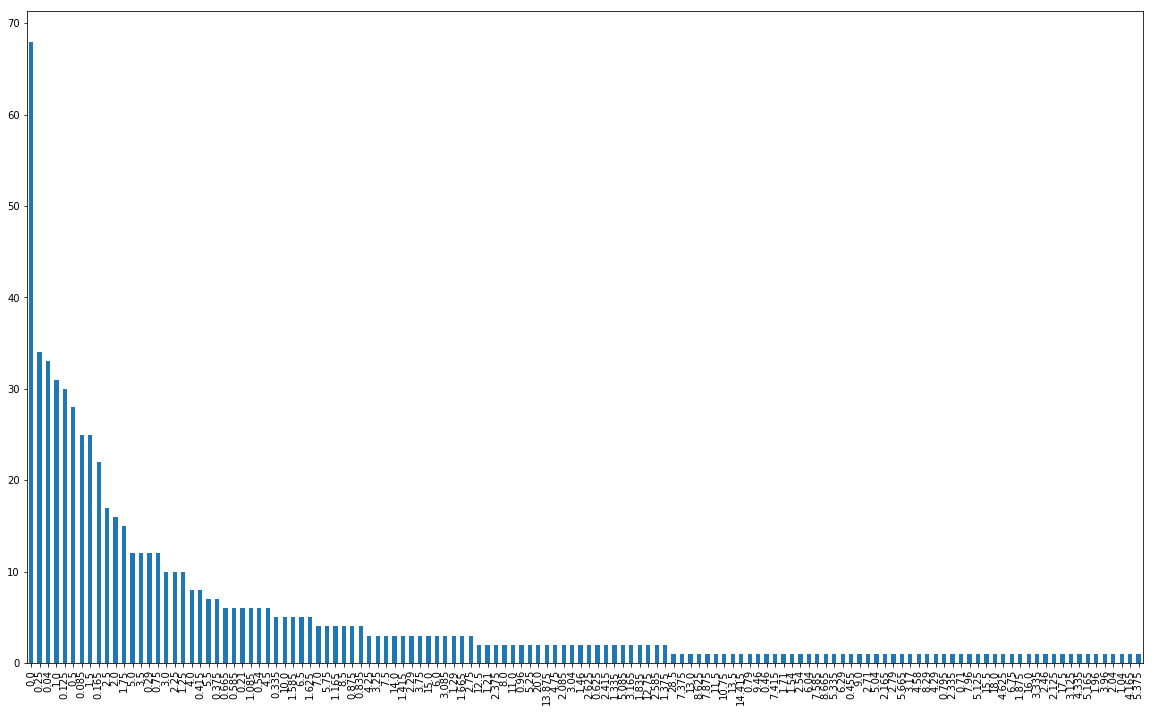

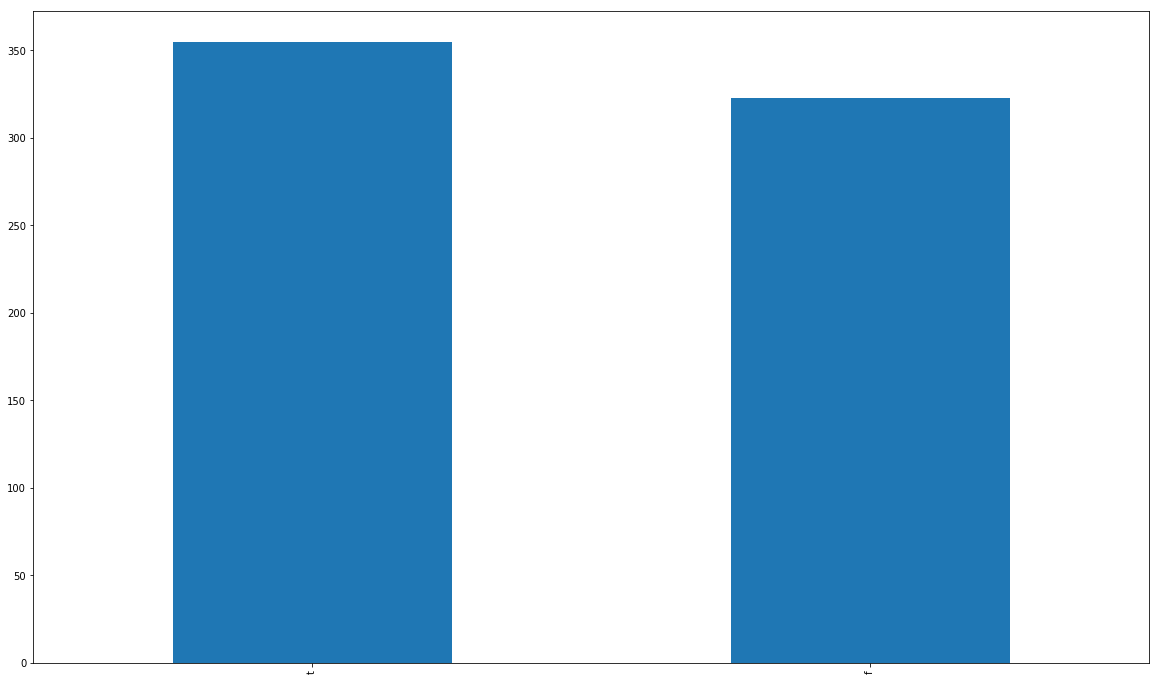

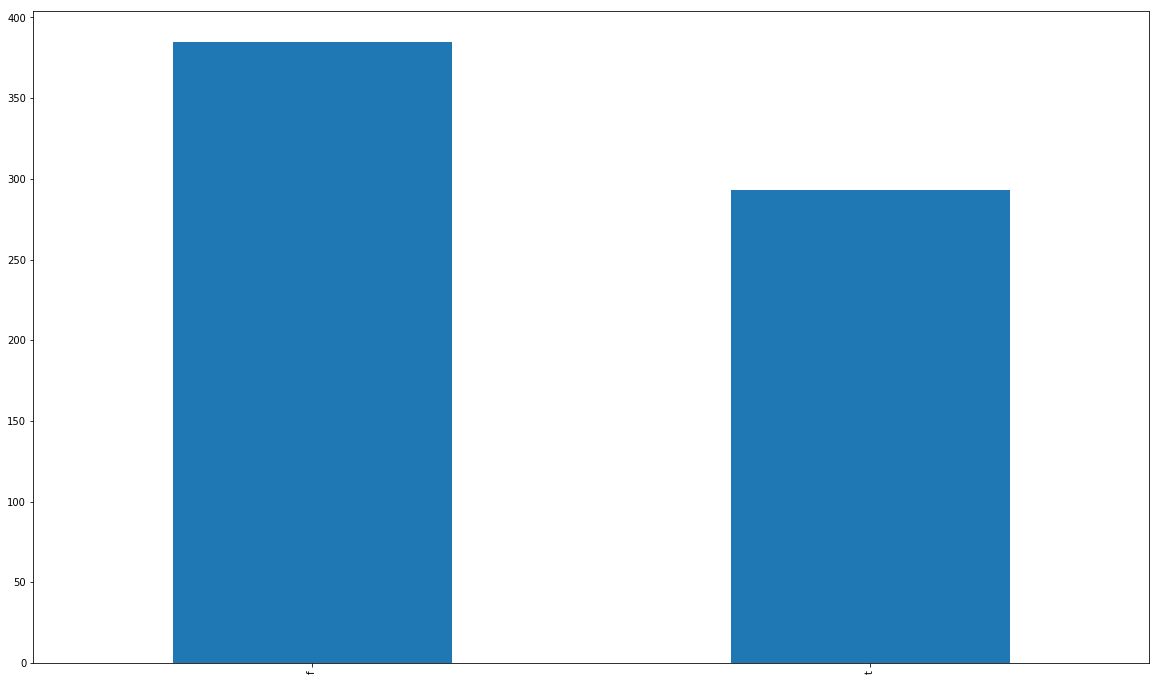

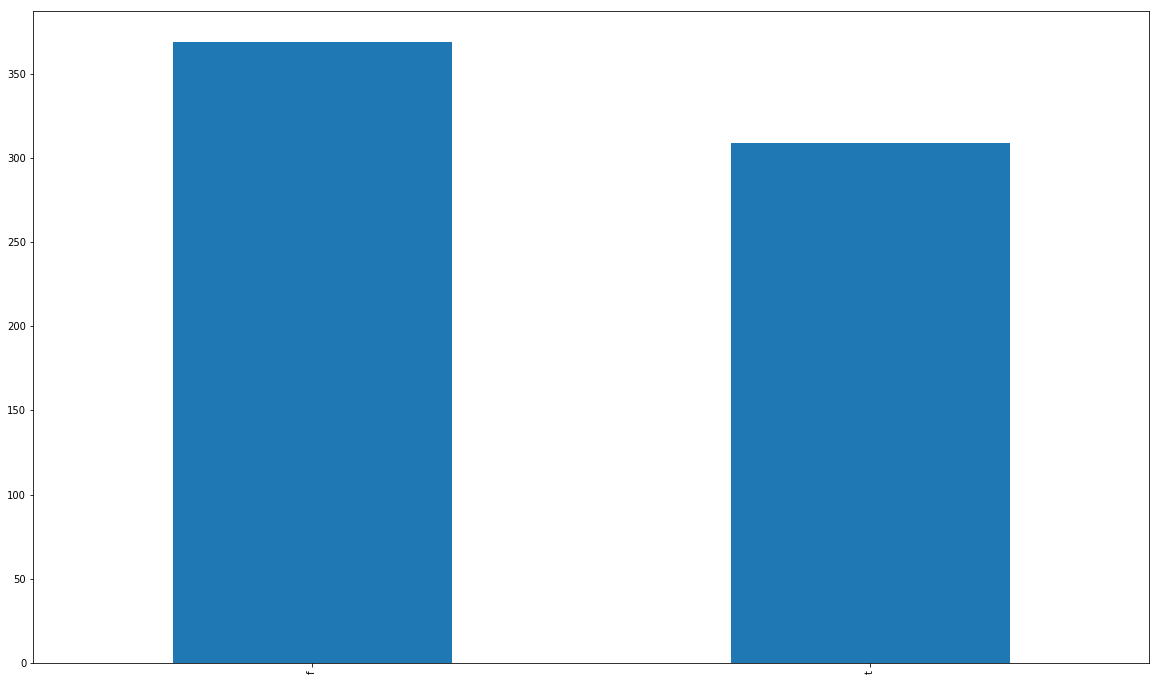

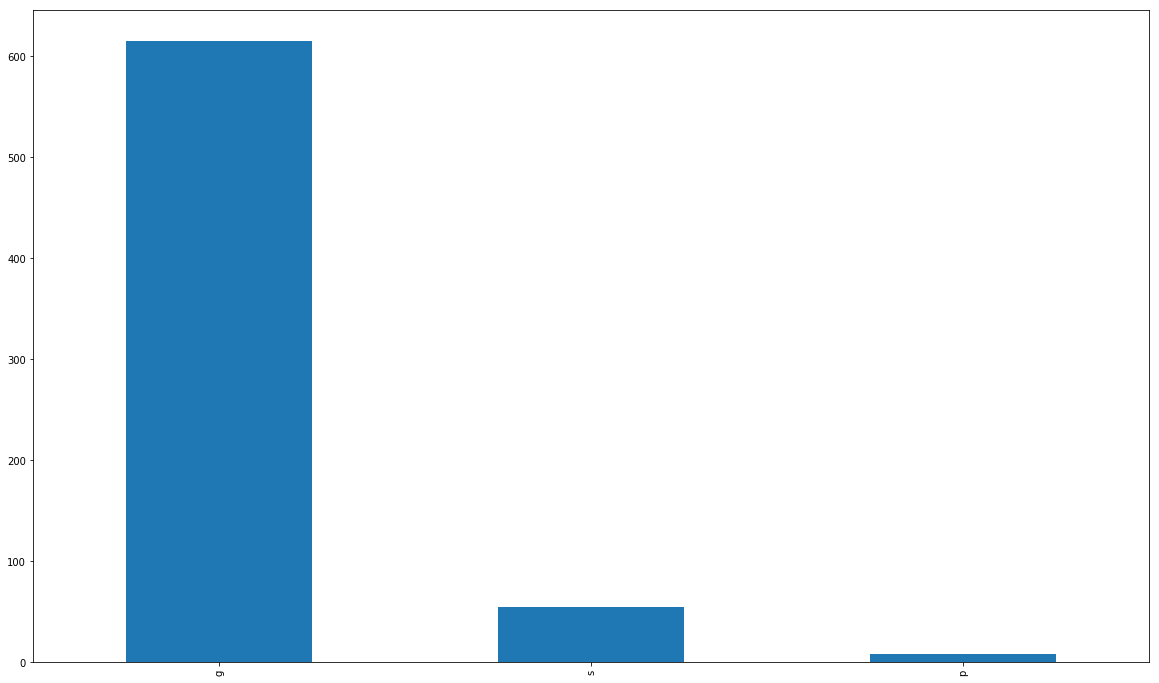

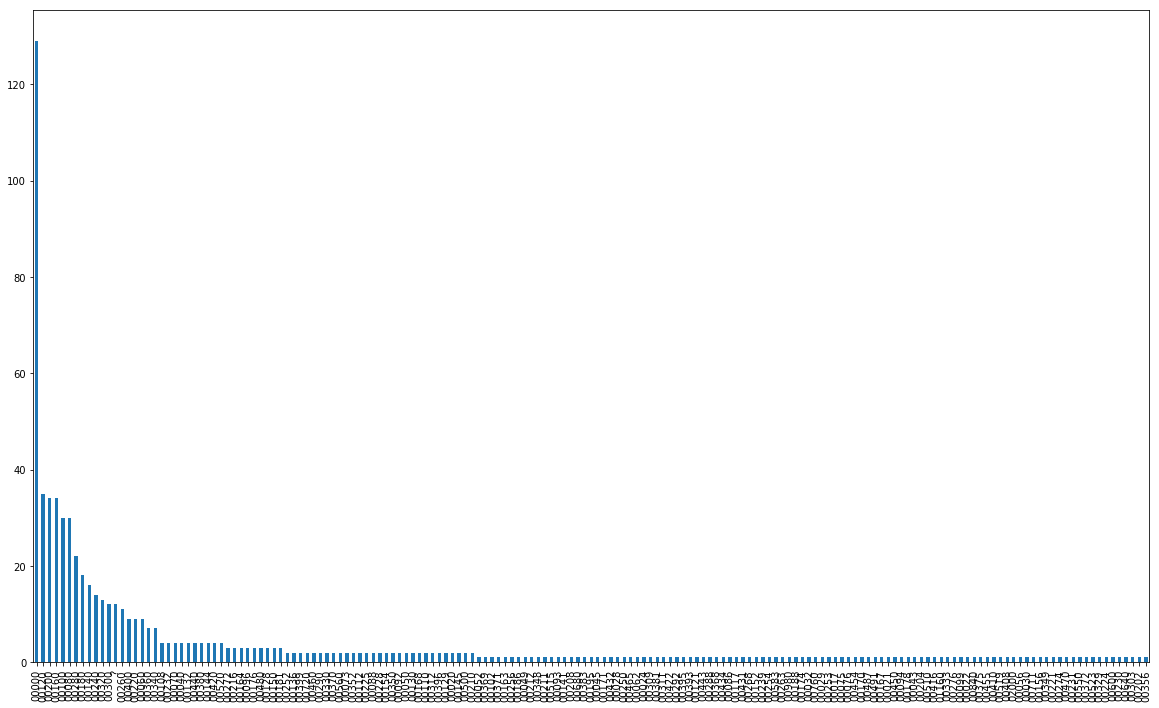

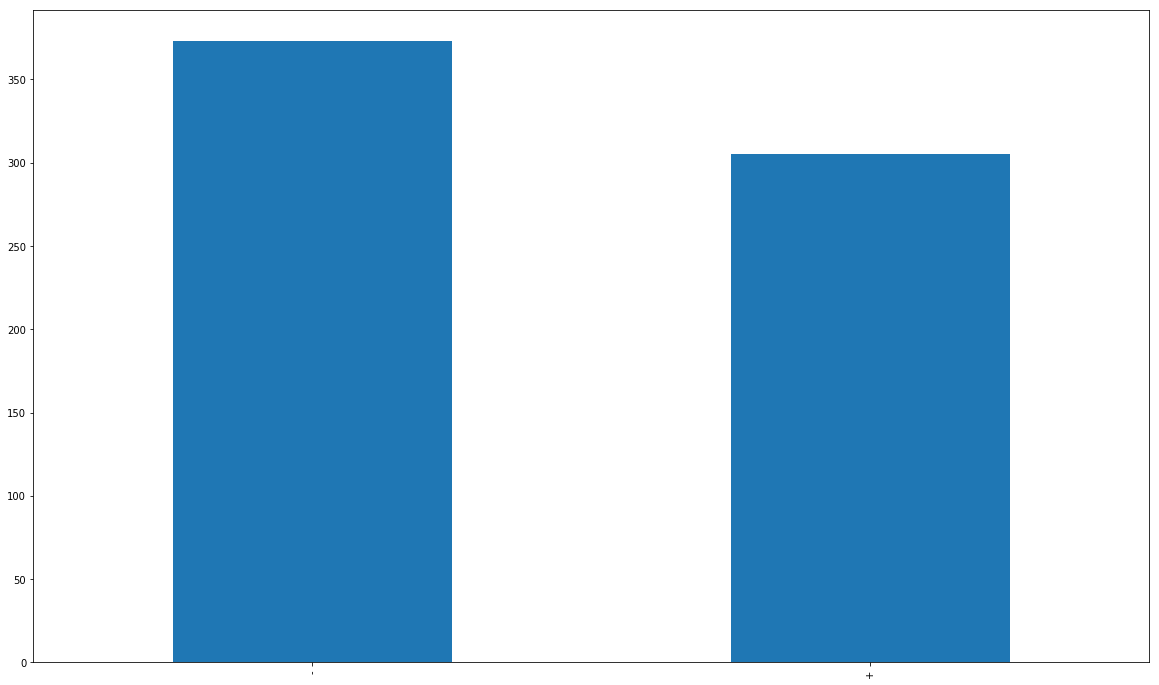

In [184]:
obj = [1,4,5,6,7,8,9,10,12,13,14,16]
for i in obj:
    ax = credits5.loc[:, i].value_counts().plot(kind='bar',figsize=(20,12))
    plt.show()

- Which variables are approximately normally distributed?

I don't see any normally distributed variables

- Which variables show strong skew?

Most variables seem skewed right.

- Make a scatterplot of each feature variable with the target variable.

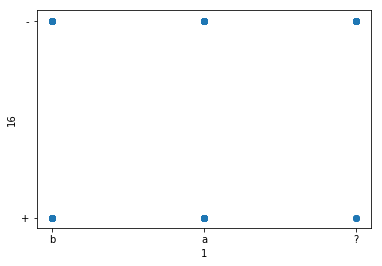

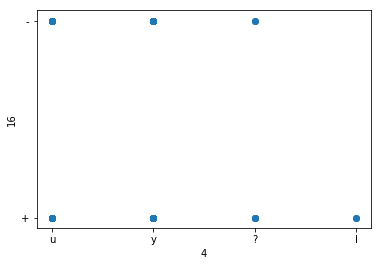

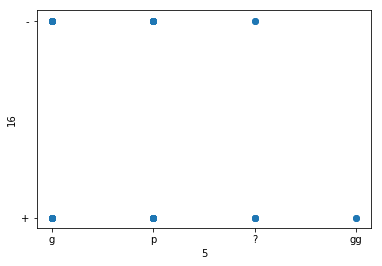

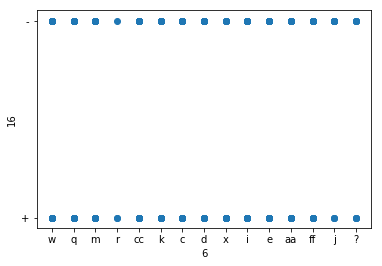

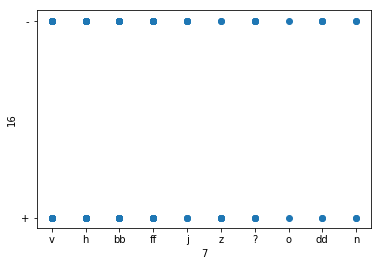

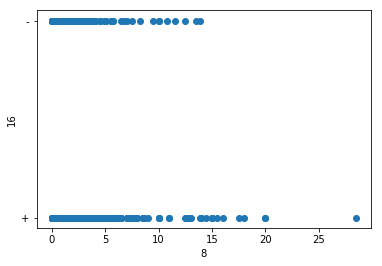

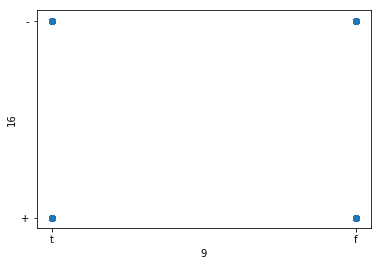

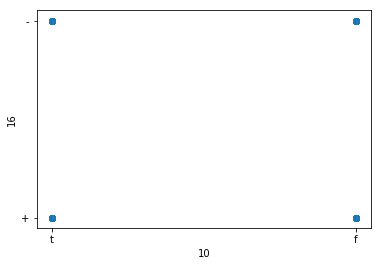

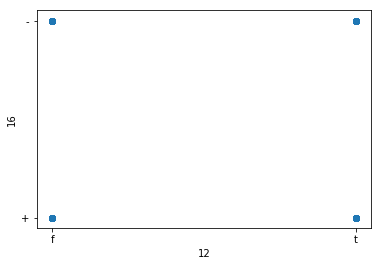

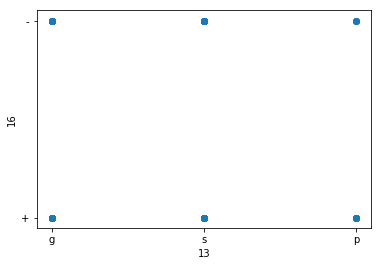

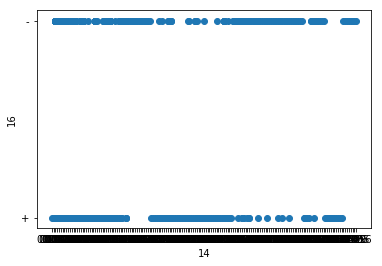

In [185]:
obj = [1,4,5,6,7,8,9,10,12,13,14]

for x in obj:
    plt.scatter(credits5.loc[:,x],credits5.loc[:,16])
    plt.xlabel(x)
    plt.ylabel('16')
    plt.show()

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

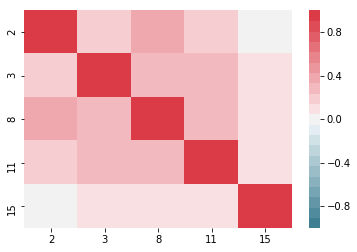

In [186]:
ax = sns.heatmap(credits5.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Attributes 8 and 2 seem fairly correlated. Might need to include a multiplicative variable to monitor bias in correlation.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [187]:
credits5.loc[:,16].value_counts(normalize=True)

-    0.550147
+    0.449853
Name: 16, dtype: float64

The model will be correct 55% of the time if it predicts "-" each time.

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [188]:
credits5 = credits4
credits5.loc[:,2] = credits5.loc[:,2].astype(float)
credits5.loc[:,3] = credits5.loc[:,3].astype(float)

In [189]:
credits5.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [193]:
X = credits5.loc[:,:15]
y = credits5.loc[:,16]

In [194]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0


In [195]:
y.head()

0    +
1    +
2    +
3    +
4    +
Name: 16, dtype: object

In [197]:
X.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
dtype: object

In [198]:
obj = [1,4,5,6,7,9,10,12,13,14]
X = pd.get_dummies(X,obj)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [200]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

0.9219409282700421
0.8284313725490197


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Model performed much better than the null model. Low bias and variance.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Performed much higher on training set than test set. Although both are good scores, there seems to be a good bit of bias in the model.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Bias problem since it performed much higher on the training set than the test set.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [203]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8431372549019608


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Clear bias as it score is 1.0 which appears to be worse than the Logistic Regression scores.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

- **BONUS:** Keep going! Find ways to make your model better.